# Pricing Analysis for Retail Pharmacy

## Executive Summary

- This project analyzes retail transaction data to understand pricing behavior and demand.
- The goal is to identify opportunities for pricing optimization while maintaining competitiveness.
- The analysis focuses on price sensitivity, revenue contribution, and product segmentation.
- Insights are translated into practical pricing recommendations for retail pharmacy contexts.


## 1. Business Problem

Pricing plays a critical role in retail pharmacy, directly impacting revenue, margins, and customer retention. 
Large pharmacy chains must balance competitive pricing with profitability, especially for essential and regulated products.

The objective of this project is to analyze pricing behavior using retail transaction data and explore how data-driven insights can support pricing decisions in a retail pharmacy context.


## 2. Dataset Description

This project uses a public retail transactions dataset as a proxy to simulate pricing challenges faced by large retail pharmacy chains such as Raia Drogasil.

The dataset contains transactional-level information, including product identifiers, unit prices, quantities sold, and transaction dates. 
These variables allow analysis of pricing behavior, demand patterns, and revenue contribution at the product level.

As the data is publicly available and not specific to Raia Drogasil, the analysis focuses on methodology and insights rather than exact operational decisions.

## 3. Data Cleaning and Preparation

Before any pricing analysis, the dataset must be cleaned and prepared to ensure data quality and reliability of results.

The following steps are performed in this phase:
- Handling missing or invalid values
- Removing inconsistent or duplicated records
- Converting data types where necessary
- Creating derived variables relevant for pricing analysis


In [1]:
import pandas as pd
df = pd.read_excel("data/online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
df.shape

(525461, 8)

In [3]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df['Invoice'] = df['Invoice'].astype(str)

In [5]:
df_clean = df[~df['Invoice'].str.startswith('C')].copy()

In [6]:
df_clean.shape

(515255, 8)

In [7]:
df_clean = df_clean[df_clean['Quantity'] > 0].copy()

In [8]:
df_clean.shape

(513134, 8)

Dataset imported from Kaggle. Cancelled invoices (Invoice = Cxx) and returns (Quantity < 0) separated from dataset.

Revenue calculation

A new revenue column is created by multiplying quantity by unit price, representing the total value of each transaction line.

In [9]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['Price']

df_clean[['Quantity', 'Price', 'Revenue']].head()

,Quantity,Price,Revenue
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


With the Revenue column its possibly to do a few analysis. (Total Revenue/Top products)

In [10]:
total_revenue = df_clean['Revenue'].sum()
total_revenue

np.float64(10169340.004)

In [11]:
top_products = (
    df_clean
    .groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [12]:
top_products

Description
Manual                                 262618.51
REGENCY CAKESTAND 3 TIER               170078.51
WHITE HANGING HEART T-LIGHT HOLDER     160630.78
DOTCOM POSTAGE                         116408.71
ASSORTED COLOUR BIRD ORNAMENT           73092.99
PAPER CHAIN KIT 50'S CHRISTMAS          58189.25
JUMBO BAG RED RETROSPOT                 56595.51
PARTY BUNTING                           49682.72
POSTAGE                                 49477.54
ROTATING SILVER ANGELS T-LIGHT HLDR     47985.09
Name: Revenue, dtype: float64

### Top products by revenue

Manual entries need to be excluded from this visualization, as they likely represent administrative adjustments rather than actual products and would distort product-level analysis.


In [13]:
top_products_no_manual = (
    df_clean[df_clean['Description'] != 'Manual']
    .groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_no_manual

Description
REGENCY CAKESTAND 3 TIER               170078.51
WHITE HANGING HEART T-LIGHT HOLDER     160630.78
DOTCOM POSTAGE                         116408.71
ASSORTED COLOUR BIRD ORNAMENT           73092.99
PAPER CHAIN KIT 50'S CHRISTMAS          58189.25
JUMBO BAG RED RETROSPOT                 56595.51
PARTY BUNTING                           49682.72
POSTAGE                                 49477.54
ROTATING SILVER ANGELS T-LIGHT HLDR     47985.09
EDWARDIAN PARASOL NATURAL               36925.26
Name: Revenue, dtype: float64

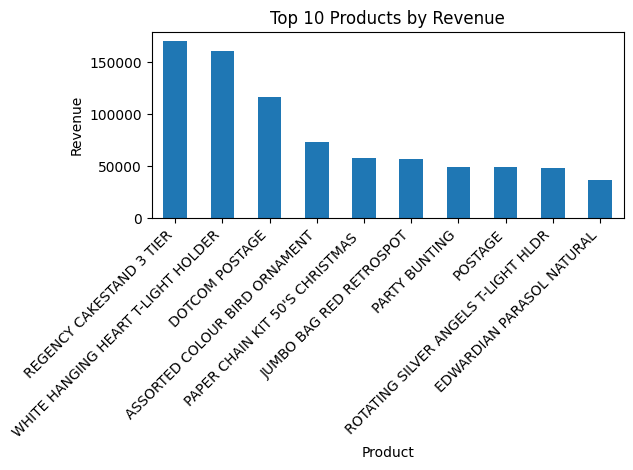

In [14]:
import matplotlib.pyplot as plt

top_products_no_manual.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Non products
I came to the conclusion that just like "Manual", both types of postage may not be considered a product depending on the type of business.
As a generic retail store, postage revenue could be more useful in a separate insight, along with Manual as "non products".

In [15]:
non_products = ['Manual', 'POSTAGE', 'DOTCOM POSTAGE']
df_products = df_clean[~df_clean['Description'].isin(non_products)].copy()

In [16]:
total_product_revenue = df_products['Revenue'].sum()

In [17]:
total_product_revenue

np.float64(9740835.243999999)

In [18]:
top10_prod_rev = (
    df_products
    .groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .sum()
)

top10_prod_rev

np.float64(726069.1799999999)

In [19]:
contrib_pct = (top10_prod_rev / total_product_revenue) * 100
contrib_pct

np.float64(7.453869835723094)

### Product revenue review
This short analysis brings up that even the top 10 most sold products still account for around 7.45% of total product revenue, indicating a rather low concentration of revenue on specific products, other than the first two products on the top 10, that account for nearly 3x as much revenue as the 3rd place.
This suggests the business moves regarding promotions or pricing may be taken within product categories or demand-over-time.

## 4. Feature Engineering

Here we will further investigate the "Invoice Date" Column. This should give insights regarding demand over time about the product, seasonality and purchasing patterns.
This will further improve pricing analysis and ML models.

In [20]:
df_clean['InvoiceYear'] = df_clean['InvoiceDate'].dt.year
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.month
df_clean['InvoiceDay'] = df_clean['InvoiceDate'].dt.day
df_clean['InvoiceHour'] = df_clean['InvoiceDate'].dt.hour
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek

In [21]:
df_clean[['InvoiceDate', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour', 'DayOfWeek']].head()

,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,DayOfWeek
0,2009-12-01 07:45:00,2009,12,1,7,1
1,2009-12-01 07:45:00,2009,12,1,7,1
2,2009-12-01 07:45:00,2009,12,1,7,1
3,2009-12-01 07:45:00,2009,12,1,7,1
4,2009-12-01 07:45:00,2009,12,1,7,1


InvoiceDate stripped into separated data. Hour to be understood as time-blocks ( 7 = 7am to 7:59am )

## 5. Pricing Problem Definition

The goal of this analysis is to understand which factors influence product pricing.
We frame this as a regression problem where the target variable is the unit price,
and explanatory variables include quantity purchased and time-based features.


In [22]:
pricing_df = df_clean[
    ['Price', 'Quantity', 'InvoiceMonth', 'InvoiceHour', 'DayOfWeek']
].copy()

In [23]:
pricing_df.head()

,Price,Quantity,InvoiceMonth,InvoiceHour,DayOfWeek
0,6.95,12,12,7,1
1,6.75,12,12,7,1
2,6.75,12,12,7,1
3,2.10,48,12,7,1
4,1.25,24,12,7,1


In [24]:
pricing_df.describe()

,Price,Quantity,InvoiceMonth,InvoiceHour,DayOfWeek
count,513134.000000,513134.000000,513134.000000,513134.000000,513134.000000
mean,3.972726,11.715433,7.450650,12.980522,2.501842
std,127.951933,92.974725,3.541281,2.417875,1.922867
min,-53594.360000,1.000000,1.000000,7.000000,0.000000
25%,1.250000,1.000000,4.000000,11.000000,1.000000
50%,2.100000,3.000000,8.000000,13.000000,2.000000
75%,4.210000,10.000000,11.000000,15.000000,4.000000
max,25111.090000,19152.000000,12.000000,20.000000,6.000000


Additional cleaning is required to remove non-positive prices, which likely
represent accounting adjustments or refunds rather than actual selling prices.
These values are not meaningful for pricing analysis.

In [25]:
pricing_df = pricing_df[pricing_df['Price'] > 0].copy()
pricing_df.describe()

,Price,Quantity,InvoiceMonth,InvoiceHour,DayOfWeek
count,511565.000000,511565.00000,511565.000000,511565.000000,511565.000000
mean,4.251841,11.40017,7.451204,12.979844,2.503815
std,63.662597,86.76126,3.541181,2.418078,1.923661
min,0.001000,1.00000,1.000000,7.000000,0.000000
25%,1.250000,1.00000,4.000000,11.000000,1.000000
50%,2.100000,3.00000,8.000000,13.000000,2.000000
75%,4.210000,10.00000,11.000000,15.000000,4.000000
max,25111.090000,19152.00000,12.000000,20.000000,6.000000


## 6. Regression Model Training

After cleaning and preparing the dataset, a linear regression model is trained
to establish a baseline relationship between product price and selected features.
This step demonstrates the application of machine learning to pricing analysis.


In [26]:
X = pricing_df[['Quantity', 'InvoiceMonth', 'InvoiceHour', 'DayOfWeek']]
y = pricing_df['Price']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


### Model Performance Interpretation
The model shows high prediction error relative to average prices.

An R² close to zero indicates that temporal features alone do not explain price variation.

This suggests that meaningful pricing models require product-level features such as product identity, category, and cost structure.

These results were expected, as the objective of this analysis was to practice the end-to-end machine learning workflow rather than to produce a business-ready pricing model.

### Model Coefficients

In [32]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df


,Feature,Coefficient
0,Quantity,-0.003531
1,InvoiceMonth,-0.023059
2,InvoiceHour,0.063704
3,DayOfWeek,-0.201215


### Coefficient Interpretation

The learned coefficients are small in magnitude, indicating that temporal and quantity-based features have limited explanatory power for product pricing.

This confirms that price is primarily driven by product-specific attributes rather than time-based features alone.


### Feature Engineering: Product Average Price

I will now do further manipulation and analysis of the current dataset. Starting by checking average pricing and investigating.

In [33]:
product_avg_price = (
    df_clean
    .groupby('StockCode')['Price']
    .mean()
    .rename('ProductAvgPrice')
)

product_avg_price.head()

StockCode
10002    0.965875
10080    0.728571
10109    0.420000
10120    0.256809
10125    1.009195
Name: ProductAvgPrice, dtype: float64

In [34]:
product_avg_price.describe()

count     4317.000000
mean        -3.564913
std        709.895581
min     -45517.340000
25%          1.384745
50%          2.550000
75%          4.925682
max      10124.020000
Name: ProductAvgPrice, dtype: float64

In [35]:
df_enriched = df_clean.merge(
    product_avg_price,
    on='StockCode',
    how='left'
)

df_enriched.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,DayOfWeek,ProductAvgPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,7,1,9.143507
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7,1,7.285925
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7,1,7.030000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,7,1,3.306887
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,7,1,1.460688


In [36]:
pricing_df = df_enriched[
    [
        'Quantity',
        'InvoiceMonth',
        'InvoiceHour',
        'DayOfWeek',
        'ProductAvgPrice',
        'Price'
    ]
].dropna()

pricing_df.head()

,Quantity,InvoiceMonth,InvoiceHour,DayOfWeek,ProductAvgPrice,Price
0,12,12,7,1,9.143507,6.95
1,12,12,7,1,7.285925,6.75
2,12,12,7,1,7.030000,6.75
3,48,12,7,1,3.306887,2.10
4,24,12,7,1,1.460688,1.25


### Regression Model with added features

The average price added into the model feature should provide with some further insights.

In [37]:
X = pricing_df[
    ['Quantity', 'InvoiceMonth', 'InvoiceHour', 'DayOfWeek', 'ProductAvgPrice']
]

y = pricing_df['Price']


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(2.2123765926529977, 9474.951127391887, 0.6302119215271271)

## Model Comparison

Two linear regression models were trained to predict product price.

**Model 1 (Time-based features only):**
- MAE: 3.69
- MSE: 8,250
- R²: ~0.00

**Model 2 (Time-based features + Product Average Price):**
- MAE: 2.21
- MSE: 9,475
- R²: 0.63

### Interpretation

The second model significantly improves explanatory power (R² from ~0 to 0.63) and reduces average prediction error (MAE).  
This confirms that temporal features alone do not explain price variation, while product-level information is essential for meaningful price prediction.

Although MSE increased slightly, the overall model quality improved substantially, as indicated by MAE and R².

In [42]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,Quantity,-0.001173
1,InvoiceMonth,0.003765
2,InvoiceHour,0.051773
3,DayOfWeek,-0.149415
4,ProductAvgPrice,1.058484


### Coefficient Analysis

The regression coefficients show that ProductAvgPrice is by far the dominant feature, indicating that historical product pricing explains most of the variation in prices.

Temporal features such as month, hour, and day of week have minimal influence, suggesting that pricing is largely stable over time rather than dynamically adjusted.

Quantity has a negligible negative coefficient, indicating limited bulk discount behavior.

Overall, the model confirms that price formation is primarily driven by product-level characteristics rather than temporal patterns.
